In [1]:
import pandas as pd
import numpy as np

data_1 = pd.read_csv('marketing_customer_analysis.csv')
display(data_1.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
#Show the dataframe shape.
data_1.shape

(9134, 24)

In [3]:
#Standardize header names.

#get all columns lowered
cols = []
for column in data_1.columns:
    cols.append(column.lower())
data_1.columns = cols


#get all columns without spaces
data_1.columns = data_1.columns.str.replace(' ', '_')

#data_1 = data_1.drop('unnamed:_0', 1)


In [4]:
data_1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:

#Which columns are numerical?
numerical = data_1.select_dtypes(['int64','float64'])
#Which columns are categorical?
categorical = data_1.select_dtypes(["object"])


In [6]:
#Check and deal with NaN values.


#not sure if the state variable is important to the analyses, so I kept the rows and created a new class, "Unknown"
data_1['state'] = data_1['state'].fillna('U')
#It only has 2 possible values values, don't know what to do...
data_1['response'] = data_1['response'].fillna('U')
#also, state and responde are related since they share the rows with nan values

#since there's only one value to this variable, 'A', I replaced all NaN values to 'B' since I guess they're not A xD...
#data_1['vehicle_type'] = data_1['vehicle_type'].fillna('U')

data_1['months_since_last_claim'] = data_1['months_since_last_claim'].fillna(data_1['months_since_last_claim'].mean()) #should I drop it or no?
data_1['number_of_open_complaints'] = data_1['number_of_open_complaints'].fillna(0) #should I drop it or no?
#months_since_last_claim and number_of_open_complaints share the same rows... thats why both of them have 633 NaN values

data_1['vehicle_size'] = data_1['vehicle_size'].fillna('U') #should I drop it or no?
data_1['vehicle_class'] = data_1['vehicle_class'].fillna('U') #should I drop it or no?
#vehicle_class and vehicle_size share the same rows... thats why both of them have 622 NaN values




In [7]:
#Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to
#show only the information for the first quarter , ie. January, February and March.
#Hint: If data from March does not exist, consider only January and February.
import time
from datetime import date
data_1['month'] = pd.DatetimeIndex(data_1['effective_to_date']).month
data_1['month'].unique()
data_1[(data_1['month']==1) | (data_1['month']==2) | (data_1['month']==3)]


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [8]:
import pandas as pd
import numpy as np
import time
from datetime import date

def clean(x):
    
    data = pd.read_csv(x)
    print(data.shape)
    
    cols = []
    for column in data.columns:
        cols.append(column.lower())
    data.columns = cols

    #get all columns without spaces
    data.columns = data.columns.str.replace(' ', '_')

    #data = data.drop('unnamed:_0', 1)

    #not sure if the state variable is important to the analyses, so I kept the rows and created a new class, "Unknown"
    data['state'] = data['state'].fillna('U')
#It only has 2 possible values values, don't know what to do...
    data['response'] = data['response'].fillna('U')
#also, state and responde are related since they share the rows with nan values

#since there's only one value to this variable, 'A', I replaced all NaN values to 'B' since I guess they're not A xD...
    #data['vehicle_type'] = data['vehicle_type'].fillna('U')

    data['months_since_last_claim'] = data['months_since_last_claim'].fillna(data['months_since_last_claim'].mean()) #should I drop it or no?
    data['number_of_open_complaints'] = data['number_of_open_complaints'].fillna(0) #should I drop it or no?
#months_since_last_claim and number_of_open_complaints share the same rows... thats why both of them have 633 NaN values

    data['vehicle_size'] = data['vehicle_size'].fillna('U') #should I drop it or no?
    data['vehicle_class'] = data['vehicle_class'].fillna('U') #should I drop it or no?
#vehicle_class and vehicle_size share the same rows... thats why both of them have 622 NaN values

    data['month'] = pd.DatetimeIndex(data['effective_to_date']).month
    data[(data['month']==1) | (data['month']==2) | (data['month']==3)]
    return data

In [9]:
a = clean('marketing_customer_analysis.csv')
a

(9134, 24)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [11]:
a.describe(include='all')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,3,9,4,4,NaN,6,3,NaN
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,NaN
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,1.463762
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN,0.498712
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,1.000000
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,1.000000
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN,1.000000
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN,2.000000


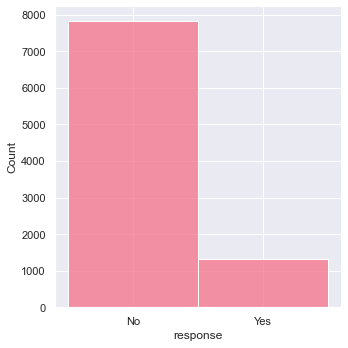

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


sns.set_palette("husl", 9)
sns.displot(a['response'])

plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

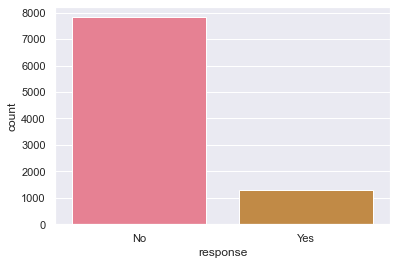

In [13]:
sns.countplot(x=a["response"],data=a)

In [14]:
#don't know why, but it I think it might be useful ...
range_i = a['income'].max() - a['income'].min()

range_tca = a['total_claim_amount'].max() - a['total_claim_amount'].min()

In [15]:
a['response_rate'] = np.where(a.response=='Yes',1,0)  #erin's tip
b=a
b['response_rate'] = b['response_rate']*100

In [16]:
a['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

# Show a plot of the response rate by the sales channel.

Text(0, 0.5, 'Response Rate')

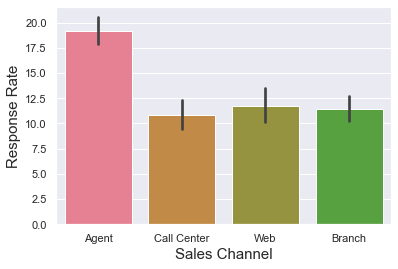

In [17]:
# conditioning plot on the basis of categorical variables
import seaborn as sns     
#a['response_count']=a['response_rate'].value_counts()

p = sns.barplot(data=b, x='sales_channel', y = 'response_rate')
p.set_xlabel("Sales Channel", fontsize = 15)
p.set_ylabel("Response Rate", fontsize = 15)



In [18]:
abc = pd.get_dummies(a['response'])
a = pd.concat([a, abc], axis=1).reindex(a.index) 

In [25]:
#df = a["No"].eq('Y').groupby(df_test["A"]).mean().reset_index()
df = a.groupby(['sales_channel'])['response_rate'].value_counts(normalize=True)
df


sales_channel  response_rate
Agent          0                0.808456
               100              0.191544
Branch         0                0.885469
               100              0.114531
Call Center    0                0.891218
               100              0.108782
Web            0                0.882264
               100              0.117736
Name: response_rate, dtype: float64

# From now on it's just garbage!

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City, Separated by Sex')

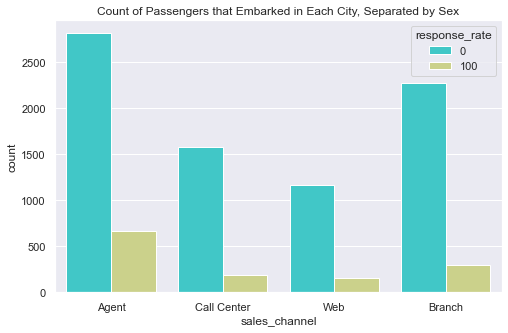

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='sales_channel',data=a, palette='rainbow',hue='response_rate')
plt.title("Count of Passengers that Embarked in Each City, Separated by Sex")

In [ ]:
import plotly.express as px
df = a.groupby(['sales_channel'])['response'].value_counts(normalize=True)
px.bar(a, x = df, y= 'response')

In [ ]:
dfa = df.rename_axis('unique_values').to_frame('counts')
print (dfa)

In [ ]:
rsc = a[['sales_channel','No','Yes','response']]
rsc

ax = sns.histplot(
    rsc,
    x='response',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='response_rate',
    hue=rsc['sales_channel'],
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Rate/Sales')
# Remove 'Count' ylabel.
ax.set_ylabel(None)
#gb = rsc.groupby(['sales_channel','response'])
#gb.head()

In [ ]:
grp = a.groupby('sales_channel','response')
for sales_channel, group in grp:
    print(name)
    print(group)
    print()

In [ ]:
sns.countplot(x=a["response"],data=pd.melt(a))
plt.show()

In [ ]:
#sns.barplot(x='response', y='income', data=a, estimator=lambda x: sum(x==0)*100.0/len(x))
x = a['income']
y=a['response_rate']
fig,axs=plt.subplots(1,2,sharey=True,tight_layout=True)
axs[0].hist(x,bins=10)
axs[1].hist(y,bins=2)
plt.show()

In [ ]:
rate_by_tca = a.groupby(sns.distplot( a=df["sepal_length"], hist=True, kde=False, rug=False ))["response_rate"].mean()
rate_by_tca
q= sns.displot(data=a, x='sales_channel', y = 'response_rate')
sns.barplot(data=a, x='sales_channel', y = 'response_rate')
p.set_xlabel("Sales Channel", fontsize = 15)
p.set_ylabel("Response Rate", fontsize = 15)

In [ ]:
sns.displot(data = a, x='income', bins=20, hue='response_rate', multiple='stack')
plt.show()

In [ ]:
g = sns.catplot(x="sales_channel", col="response",estimator= 'scalar',
                data=a, kind="bar",
                height=4, aspect=.7);

In [ ]:
modifiedDF = a.set_index('sales_channel')

modifiedDF['response_rate'].plot(kind='bar', stacked=True, color=['red', 'pink'])
 
# Add Title and Labels
plt.title('Intermediate Students Pass %')
plt.xlabel('Year')
plt.ylabel('Percentage Ranges')



In [ ]:

 
# create stacked bar chart for students DataFrame
rsc.plot(kind='bar', stacked=True, color=['red', 'pink'])
 
# Add Title and Labels
plt.title('Intermediate Students Pass %')
plt.xlabel('Year')
plt.ylabel('Percentage Ranges')

In [ ]:
abc = pd.get_dummies(a['response'])
a = pd.concat([a, abc], axis=1).reindex(a.index) 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.

 
# removing the column 'Purchased' from df
# as it is of no use now.
#df.drop('Purchased', axis=1, inplace=True)
a